# Contrast stretching techniques comparison

<small>Author: Fernando Carlos López Hernández</small>
<p>This notebook shows how to implement autocontrast and equalization with the RGB and HSV histograms

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
from skimage import color
im = skimage.io.imread('images/leopard.jpg')

First we compute the percentile autocontrast with the RGB histogram. You can set the <code>percentile</code> variable to indicate the percentile cut-off 

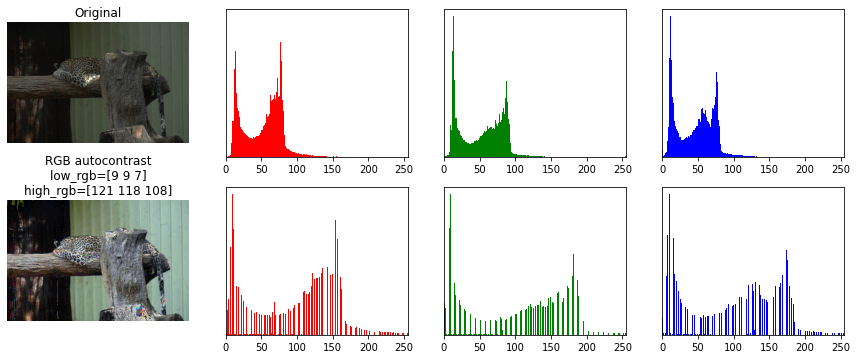

In [2]:
percentile = 1.0
max_s = 255.0
rgb_channels = np.reshape(im,(-1,3))
low_rgb = np.percentile(rgb_channels, percentile, axis = 0).reshape(1,3).astype('uint8')
high_rgb = np.percentile(rgb_channels, 100.0-percentile, axis = 0).reshape(1,3).astype('uint8')
out_rgb = max_s/(high_rgb-low_rgb)*(rgb_channels-low_rgb)
out_rgb = np.reshape(out_rgb,im.shape).astype(np.uint8)
# We show the RGB autocontrast and the histograms
plt.rcParams['figure.figsize'] = [15, 6]
fig, axes = plt.subplots(nrows=2, ncols=4)
axes[0,0].imshow(im); axes[0,0].set_title('Original'); axes[0,0].set_axis_off()
axes[0,1].get_yaxis().set_visible(False)
axes[0,1].hist(rgb_channels[:,0], bins = 256, color = 'red')
axes[0,1].set_xlim([0, 255])
axes[0,2].get_yaxis().set_visible(False)
axes[0,2].hist(rgb_channels[:,1], bins = 256, color = 'green')
axes[0,2].set_xlim([0, 255])
axes[0,3].get_yaxis().set_visible(False)
axes[0,3].hist(rgb_channels[:,2], bins = 256, color = 'blue')
axes[0,3].set_xlim([0, 255])
axes[1,0].imshow(out_rgb)
axes[1,0].set_title('RGB autocontrast\nlow_rgb=%s\nhigh_rgb=%s' % (str(low_rgb.ravel()),str(high_rgb.ravel())))
axes[1,0].set_axis_off()
axes[1,1].get_yaxis().set_visible(False)
axes[1,1].hist(out_rgb[:,:,0].ravel(), bins = 256, color = 'red')
axes[1,1].set_xlim([0, 255])
axes[1,2].get_yaxis().set_visible(False)
axes[1,2].hist(out_rgb[:,:,1].ravel(), bins = 256, color = 'green')
axes[1,2].set_xlim([0, 255])
axes[1,3].get_yaxis().set_visible(False)
axes[1,3].hist(out_rgb[:,:,2].ravel(), bins = 256, color = 'blue')
axes[1,3].set_xlim([0, 255]);

We compute the percentile autocontrast with the HSV histogram by adjusting only the value channel
<p>Take into account that the values of the V channel are in the range 0.0 .. 1.0

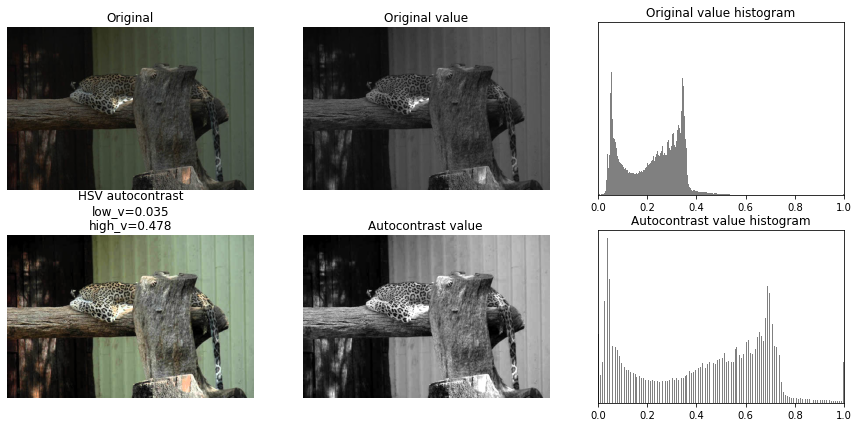

In [3]:
im_hsv = color.rgb2hsv(im)
max_s = 1.0
v_channel = im_hsv[:,:,2]
low_auto_v = np.percentile(v_channel.ravel(), percentile, axis = 0)
high_auto_v = np.percentile(v_channel.ravel(), 100.0-percentile, axis = 0)
out_auto_v = max_s/(high_auto_v-low_auto_v)*(v_channel.ravel()-low_auto_v)
out_auto_v = np.clip(out_auto_v, a_min = 0.0, a_max = 1.0)
out_auto_v = np.reshape(out_auto_v,v_channel.shape)
out_auto_hsv = im_hsv.copy()
out_auto_hsv[:,:,2] = out_auto_v
out_auto_hsv = color.hsv2rgb(out_auto_hsv)
out_auto_hsv = (255*out_auto_hsv).astype(np.uint8)
# We show the HSV autocontrast result and Value histogram
plt.rcParams['figure.figsize'] = [15, 7]
fig, axes = plt.subplots(nrows=2, ncols=3)
axes[0,0].imshow(im); axes[0,0].set_title('Original'); axes[0,0].set_axis_off()
axes[0,1].imshow(v_channel, cmap = 'gray'); axes[0,1].set_title('Original value'); axes[0,1].set_axis_off()
axes[0,2].get_yaxis().set_visible(False)
axes[0,2].hist(v_channel.ravel(), bins = 256, color = 'gray')
axes[0,2].set_title('Original value histogram')
axes[0,2].set_xlim([0.0, 1.0])
axes[1,0].imshow(out_auto_hsv)
axes[1,0].set_title('HSV autocontrast\nlow_v=%s\nhigh_v=%s' % (round(low_auto_v,3),round(high_auto_v,3)))
axes[1,0].set_axis_off()
axes[1,1].imshow(out_auto_v, cmap = 'gray'); axes[1,1].set_title('Autocontrast value'); axes[1,1].set_axis_off()
axes[1,2].get_yaxis().set_visible(False)
axes[1,2].hist(out_auto_v.ravel(), bins = 256, color = 'gray')
axes[1,2].set_title('Autocontrast value histogram')
axes[1,2].set_xlim([0.0, 1.0]);

Now, we compute the HSV equalization with the Value channel, which values are in the range 0.0 .. 1.0
<p>Finally we compare constrast stretching by means of autocontrast and equalization

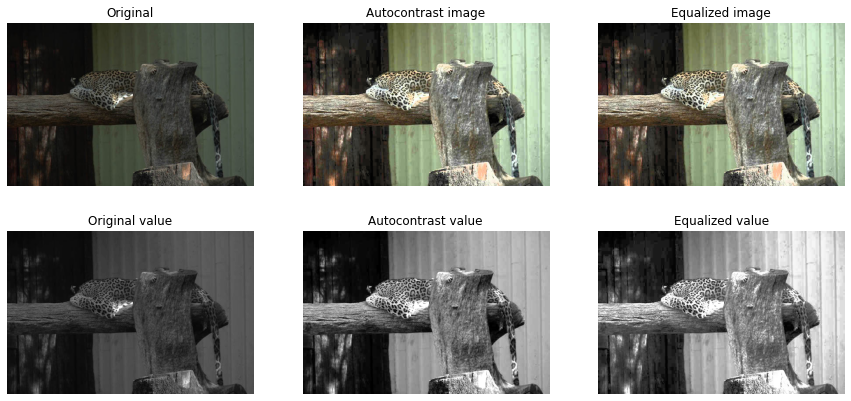

In [4]:
N = v_channel.size
L = 256
labels, counts = np.unique(v_channel, return_counts=True)
h = counts
H = np.cumsum(counts)
s = 1.0/N*H
# Use a LUT to map input labels to equalized values
mapping = dict(zip(labels, s))
out_eq_v = np.vectorize(mapping.get)(v_channel)
out_eq_hsv = im_hsv.copy()
out_eq_hsv[:,:,2] = out_eq_v
out_eq_hsv = color.hsv2rgb(out_eq_hsv)
out_eq_hsv = (255*out_eq_hsv).astype(np.uint8)
# We show and compare constrast stretching by means of autocontrast and equalization
plt.rcParams['figure.figsize'] = [15, 7]
fig, axes = plt.subplots(nrows=2, ncols=3)
axes[0,0].imshow(im); axes[0,0].set_title('Original')
axes[1,0].imshow(v_channel, cmap = 'gray'); axes[1,0].set_title('Original value')
axes[0,1].imshow(out_eq_hsv); axes[0,1].set_title('Autocontrast image')
axes[1,1].imshow(out_auto_v, cmap = 'gray'); axes[1,1].set_title('Autocontrast value')
axes[0,2].imshow(out_eq_hsv); axes[0,2].set_title('Equalized image')
axes[1,2].imshow(out_eq_v, cmap = 'gray'); axes[1,2].set_title('Equalized value')
for ax in axes.reshape(-1): 
    ax.set_axis_off()